In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
"""
Load data
"""

path = 'EURUSD.json'

with open(path) as jf:
    data = json.load(jf)['Candles'][0]['Candles']
    
len(data)

1000

In [3]:
"""
Get prices
"""

opens = list()

for d in data:
    opens.append(d['Open'])
    
len(opens)

1000

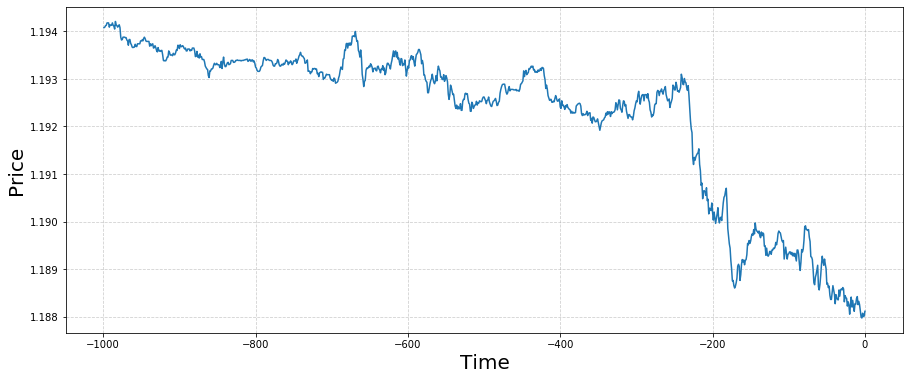

In [4]:
"""
Plot
"""
def make_t(seq):
    return [-i for i in range(len(seq))]

# data
x = make_t(opens)
y = opens

# figure
plt.figure(figsize=(15,6))
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.grid(alpha=0.6, linestyle='--')

plt.plot(x, y)
plt.show()

In [5]:
"""
Moving Average, MA
"""
MA5 = list()
MA20 = list()
MA60 = list()

for i in range(len(opens)):
    # 5 intervals
    try: 
        ma5 = sum([opens[i+j] for j in range(5)]) / 5
        MA5.append(ma5)
    except:
        pass
    # 20 intervals
    try:
        ma20 = sum([opens[i+j] for j in range(20)]) / 20
        MA20.append(ma20)
    except:
        pass
    # 60 intervals
    try:
        ma60 = sum([opens[i+j] for j in range(60)]) / 60
        MA60.append(ma60)
    except:
        pass
    
len(MA5), len(MA20), len(MA60)    

(996, 981, 941)

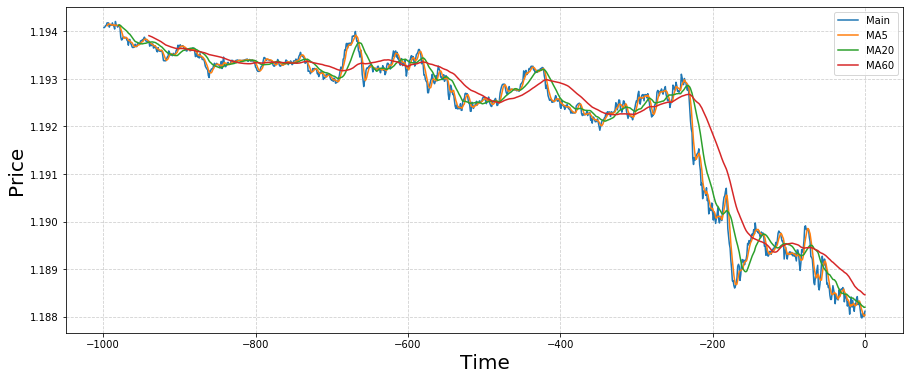

In [6]:
# plot
plt.figure(figsize=(15,6))
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.grid(alpha=0.6, linestyle='--')

l1, = plt.plot(make_t(opens), opens, label='Main')
l2, = plt.plot(make_t(MA5), MA5, label='MA5')
l3, = plt.plot(make_t(MA20), MA20, label='MA20')
l4, = plt.plot(make_t(MA60), MA60, label='MA60')

# add legend
plt.legend(handles=[l1,l2,l3,l4,], loc='best')

plt.show()

In [7]:
"""
Relative Strength Index , RSI
"""

def cal_RSI(price_seq:list, n=14):
    """
    mean rises / (mean rises + mean falls) in n intervals
    """
    RSI = list()
    
    for i in range(len(price_seq) - n):
        seq = [price_seq[i+j] for j in range(n)]
        rises = list()
        falls = list()
        for j in range(n-1):
            diff = seq[j] - seq[j+1]
            if diff > 0:
                rises.append(diff)
            else:
                falls.append(diff)
        
        mean_rises = sum(rises) / len(rises)
        mean_falls = -sum(falls) / len(falls)
        rsi = mean_rises*100 / (mean_rises + mean_falls)
        RSI.append(rsi)
    return RSI

RSI = cal_RSI(opens)
len(RSI)

986

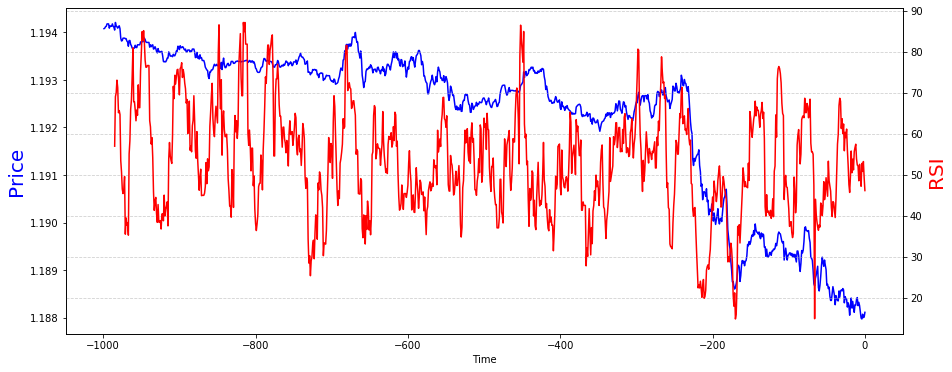

In [8]:
fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()  # mirror copy axis from left to right
ax1.plot(make_t(opens), opens, 'b')
ax2.plot(make_t(RSI), RSI, 'r')

ax1.set_xlabel('Time')
ax1.set_ylabel('Price', color='b', fontsize=20)
ax2.set_ylabel('RSI', color='r', fontsize=20)
ax2.grid(alpha=0.6, linestyle='--')

plt.show()

In [9]:
"""
Bollinger Bands
"""

def cal_bollinger(price_seq:list, n=20, k=2):
    ceiling = list()
    ground = list()
    
    for i in range(len(price_seq) - n):
        seq = np.array([price_seq[i+j] for j in range(n)])
        mean = np.mean(seq)
        std = np.std(seq)
        c = mean + k * std
        g = mean - k * std
        ceiling.append(c)
        ground.append(g)
        
    return ceiling, ground
    
ceiling, ground = cal_bollinger(opens)
len(ceiling)

980

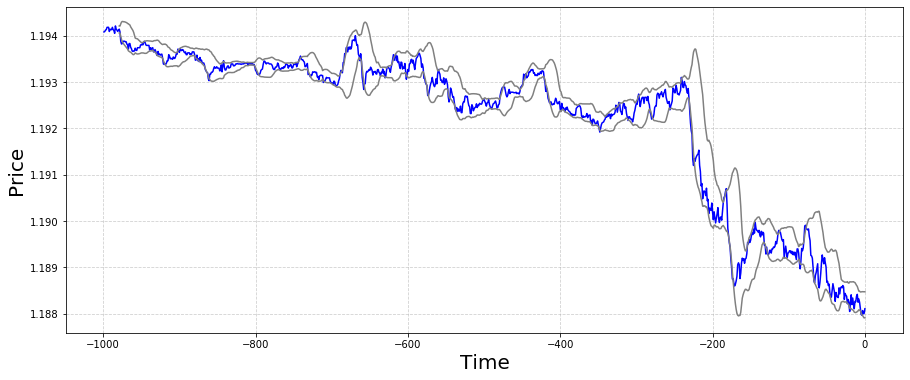

In [10]:
# plot
plt.figure(figsize=(15,6))
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.grid(alpha=0.6, linestyle='--')

plt.plot(make_t(opens), opens, 'b')
plt.plot(make_t(ceiling), ceiling, 'gray')
plt.plot(make_t(ground), ground, 'gray')

plt.show()

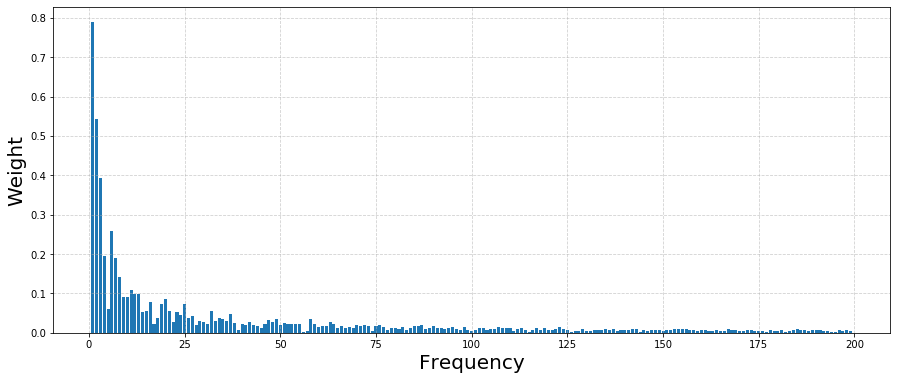

In [11]:
"""
FFT
"""
np_prices = np.array(opens)
fft = np.abs(np.fft.fft(np_prices))

# adjust view
view = (1, 200)

# plot
plt.figure(figsize=(15,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Weight', fontsize=20)
plt.grid(alpha=0.6, linestyle='--')

plt.bar(np.arange(*view), fft[view[0]:view[1]])
plt.show()

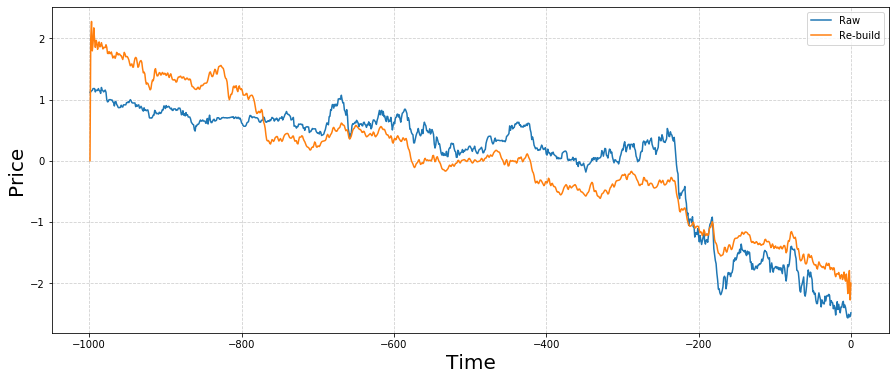

In [12]:
"""
Re-build curve
"""

raw = opens
x = np.arange(len(raw))

# re-build
curve = np.zeros(len(x))
for i, n in enumerate(fft[0:300]):
    curve += n * np.sin(i*x*2*np.pi/len(x))

# normalization
raw = np.array(raw)
norm_raw = (raw - np.mean(raw)) / np.std(raw)
norm_cur = (curve - np.mean(curve)) / np.std(curve)
    
plt.figure(figsize=(15,6))
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.grid(alpha=0.6, linestyle='--')

l1, = plt.plot(make_t(norm_raw), norm_raw, label='Raw')
l2, = plt.plot(make_t(norm_cur), norm_cur[::-1], label='Re-build')
plt.legend(handles=[l1,l2,], loc='best')

plt.show()